<a href="https://colab.research.google.com/github/ArturoMachuca/IA_2024_01/blob/main/Graficos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [8]:
df = pd.read_csv('/content/drive/MyDrive/energy_dataset.csv')

Visualizacion de los datos

In [3]:
df

,time,generation biomass,generation fossil brown coal/lignite,generation fossil coal-derived gas,generation fossil gas,generation fossil hard coal,generation fossil oil,generation fossil oil shale,generation fossil peat,generation geothermal,...,generation waste,generation wind offshore,generation wind onshore,forecast solar day ahead,forecast wind offshore eday ahead,forecast wind onshore day ahead,total load forecast,total load actual,price day ahead,price actual
0,2015-01-01 00:00:00+01:00,447.0,329.0,0.0,4844.0,4821.0,162.0,0.0,0.0,0.0,...,196.0,0.0,6378.0,17.0,NaN,6436.0,26118.0,25385.0,50.10,65.41
1,2015-01-01 01:00:00+01:00,449.0,328.0,0.0,5196.0,4755.0,158.0,0.0,0.0,0.0,...,195.0,0.0,5890.0,16.0,NaN,5856.0,24934.0,24382.0,48.10,64.92
2,2015-01-01 02:00:00+01:00,448.0,323.0,0.0,4857.0,4581.0,157.0,0.0,0.0,0.0,...,196.0,0.0,5461.0,8.0,NaN,5454.0,23515.0,22734.0,47.33,64.48
3,2015-01-01 03:00:00+01:00,438.0,254.0,0.0,4314.0,4131.0,160.0,0.0,0.0,0.0,...,191.0,0.0,5238.0,2.0,NaN,5151.0,22642.0,21286.0,42.27,59.32
4,2015-01-01 04:00:00+01:00,428.0,187.0,0.0,4130.0,3840.0,156.0,0.0,0.0,0.0,...,189.0,0.0,4935.0,9.0,NaN,4861.0,21785.0,20264.0,38.41,56.04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35059,2018-12-31 19:00:00+01:00,297.0,0.0,0.0,7634.0,2628.0,178.0,0.0,0.0,0.0,...,277.0,0.0,3113.0,96.0,NaN,3253.0,30619.0,30653.0,68.85,77.02
35060,2018-12-31 20:00:00+01:00,296.0,0.0,0.0,7241.0,2566.0,174.0,0.0,0.0,0.0,...,280.0,0.0,3288.0,51.0,NaN,3353.0,29932.0,29735.0,68.40,76.16
35061,2018-12-31 21:00:00+01:00,292.0,0.0,0.0,7025.0,2422.0,168.0,0.0,0.0,0.0,...,286.0,0.0,3503.0,36.0,NaN,3404.0,27903.0,28071.0,66.88,74.30
35062,2018-12-31 22:00:00+01:00,293.0,0.0,0.0,6562.0,2293.0,163.0,0.0,0.0,0.0,...,287.0,0.0,3586.0,29.0,NaN,3273.0,25450.0,25801.0,63.93,69.89




*   Guardamos en y todos los valores de la columna 'total load actual', siendo este parametro lo que queremos predecir.

*  Suprimimos de df todas las columnas de generación a excepcion de 'generation wind onshore' y 'generation wind offshore'.

*   Guardamos en X todas las columnas de df modificado sin 'total load actual'.










In [9]:
y = df[df.columns[26]]
cols = range(1,20)
df.drop(df.columns[cols], axis=1, inplace=True)
X = df.drop('total load actual',axis=1)
X ## Para comparar con total load actual

,time,generation wind offshore,generation wind onshore,forecast solar day ahead,forecast wind offshore eday ahead,forecast wind onshore day ahead,total load forecast,price day ahead,price actual
0,2015-01-01 00:00:00+01:00,0.0,6378.0,17.0,NaN,6436.0,26118.0,50.10,65.41
1,2015-01-01 01:00:00+01:00,0.0,5890.0,16.0,NaN,5856.0,24934.0,48.10,64.92
2,2015-01-01 02:00:00+01:00,0.0,5461.0,8.0,NaN,5454.0,23515.0,47.33,64.48
3,2015-01-01 03:00:00+01:00,0.0,5238.0,2.0,NaN,5151.0,22642.0,42.27,59.32
4,2015-01-01 04:00:00+01:00,0.0,4935.0,9.0,NaN,4861.0,21785.0,38.41,56.04
...,...,...,...,...,...,...,...,...,...
35059,2018-12-31 19:00:00+01:00,0.0,3113.0,96.0,NaN,3253.0,30619.0,68.85,77.02
35060,2018-12-31 20:00:00+01:00,0.0,3288.0,51.0,NaN,3353.0,29932.0,68.40,76.16
35061,2018-12-31 21:00:00+01:00,0.0,3503.0,36.0,NaN,3404.0,27903.0,66.88,74.30
35062,2018-12-31 22:00:00+01:00,0.0,3586.0,29.0,NaN,3273.0,25450.0,63.93,69.89


Histograma ## falta corregir

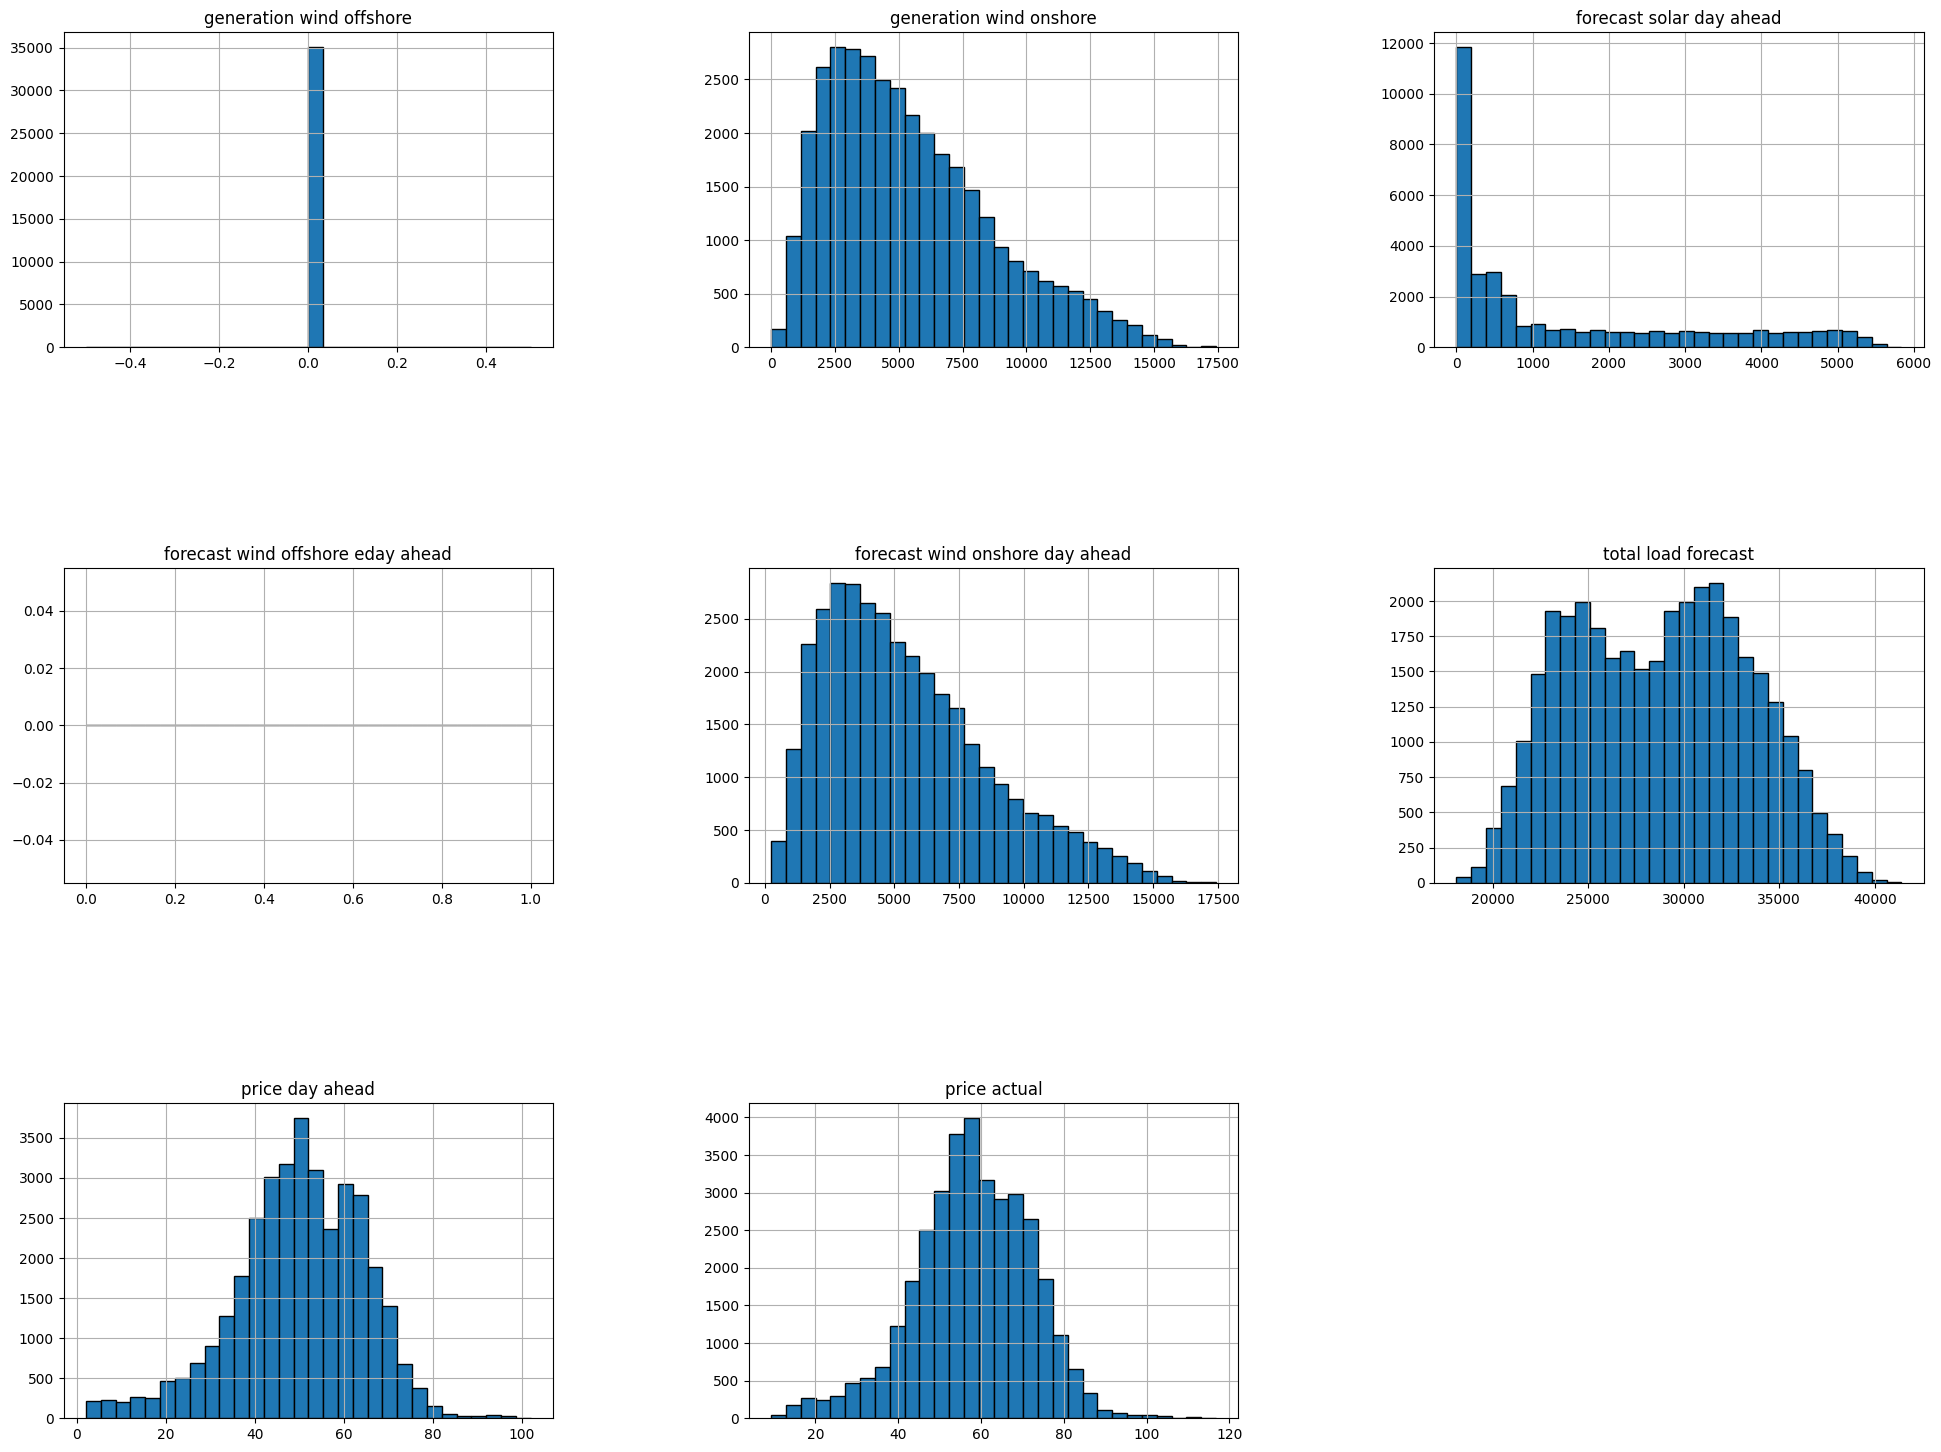

In [10]:
X.hist(figsize=(24,18), bins = 30, edgecolor='black')
plt.subplots_adjust(hspace=0.7, wspace=0.4)

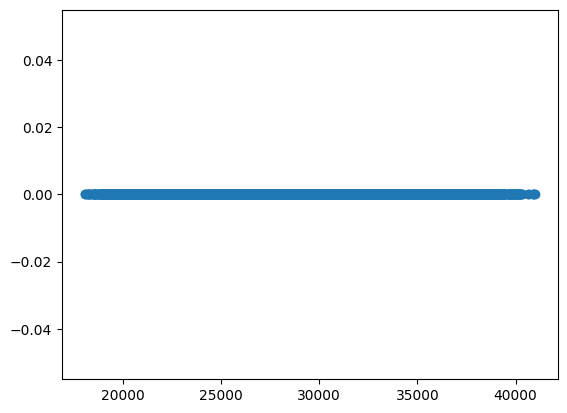

In [19]:
y1 = X.iloc[:,1]
plt.scatter(y,y1)
plt.show()

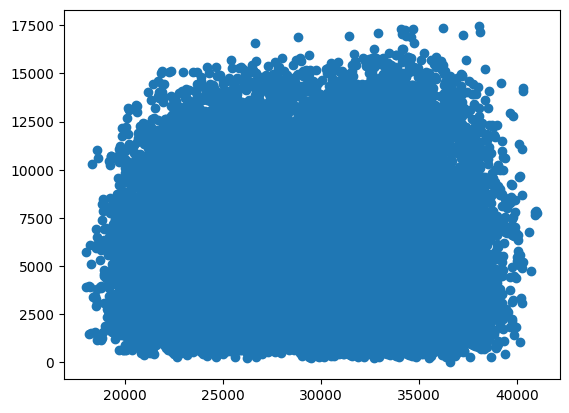

In [18]:
y2 = X.iloc[:,2]
plt.scatter(y,y2)
plt.show()

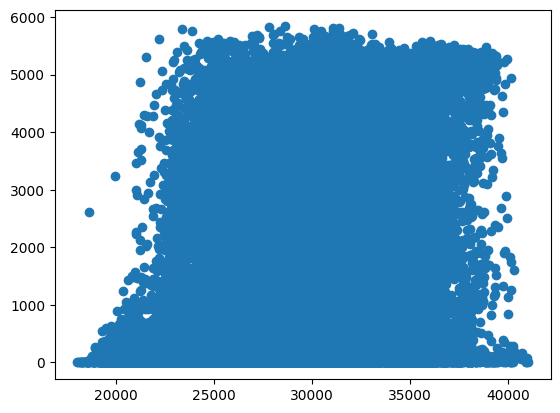

In [20]:
y3 = X.iloc[:,3]
plt.scatter(y,y3)
plt.show()

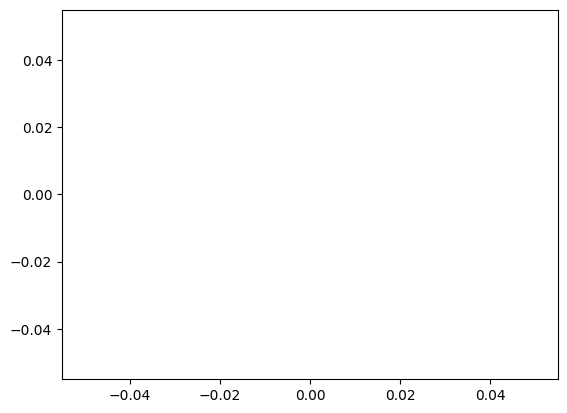

In [21]:
y4 = X.iloc[:,4]
plt.scatter(y,y4)
plt.show()

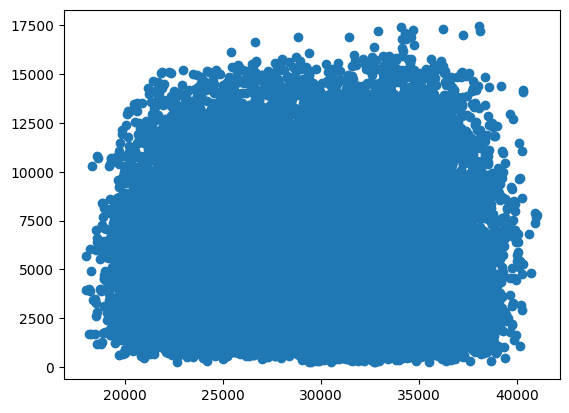

In [22]:
y5 = X.iloc[:,5]
plt.scatter(y,y5)
plt.show()

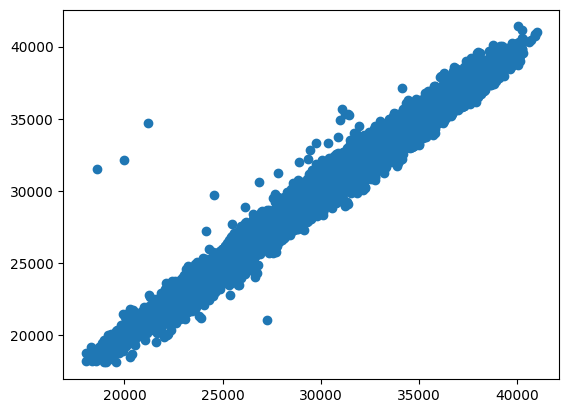

In [23]:
y6 = X.iloc[:,6]
plt.scatter(y,y6)
plt.show()

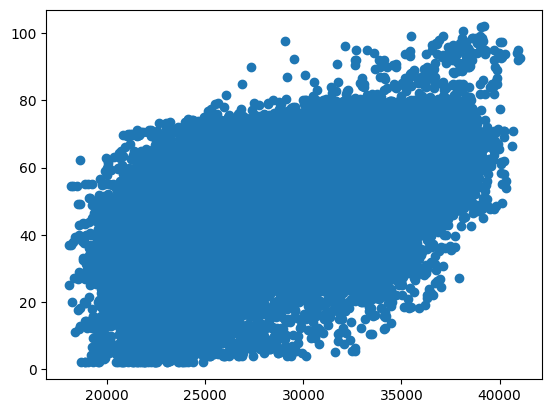

In [24]:
y7 = X.iloc[:,7]
plt.scatter(y,y7)
plt.show()

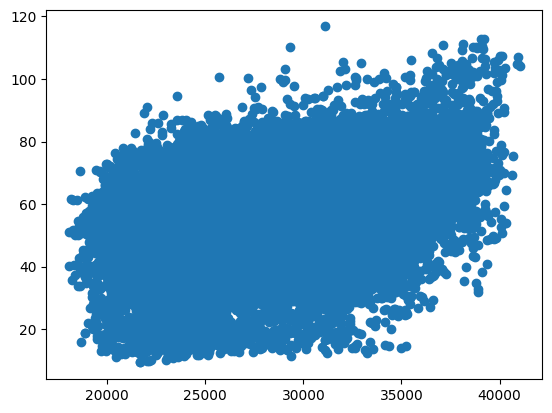

In [25]:
y8 = X.iloc[:,8]
plt.scatter(y,y8)
plt.show()